# Load Covid dataset

## Load CSV

In [1]:
import pandas as pd

covid_data = pd.read_csv('../lung_pollution/data/RKI_corona_landskreise.csv')

covid_data.shape

(411, 47)

In [2]:
covid_data.columns

Index(['OBJECTID', 'ADE', 'GF', 'BSG', 'RS', 'AGS', 'SDV_RS', 'GEN', 'BEZ',
       'IBZ', 'BEM', 'NBD', 'SN_L', 'SN_R', 'SN_K', 'SN_V1', 'SN_V2', 'SN_G',
       'FK_S3', 'NUTS', 'RS_0', 'AGS_0', 'WSK', 'EWZ', 'KFL', 'DEBKG_ID',
       'Shape__Area', 'Shape__Length', 'death_rate', 'cases', 'deaths',
       'cases_per_100k', 'cases_per_population', 'BL', 'BL_ID', 'county',
       'last_update', 'cases7_per_100k', 'recovered', 'EWZ_BL',
       'cases7_bl_per_100k', 'cases7_bl', 'death7_bl', 'cases7_lk',
       'death7_lk', 'cases7_per_100k_txt', 'AdmUnitId'],
      dtype='object')

In [3]:
covid_data = covid_data[['BL','county','EWZ','Shape__Area', 'death_rate', 'cases', 'deaths','cases_per_100k']]
covid_data.head()

,BL,county,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k
0,Schleswig-Holstein,SK Flensburg,89934,4.918293e+07,1.223721,3187,39,3543.709832
1,Schleswig-Holstein,SK Kiel,246601,1.122314e+08,1.409469,8301,117,3366.166398
2,Schleswig-Holstein,SK Lübeck,215846,2.116771e+08,1.392355,7613,106,3527.051694
3,Schleswig-Holstein,SK Neumünster,79905,7.140224e+07,0.889996,2809,25,3515.424567
4,Schleswig-Holstein,LK Dithmarschen,133251,1.425511e+09,1.915323,2976,57,2233.379112


## Feature engineering: create deaths/100k column

In [4]:
covid_data['deaths_per_100k'] = covid_data['deaths']/covid_data['EWZ']*100_000
covid_data.head()

,BL,county,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k
0,Schleswig-Holstein,SK Flensburg,89934,4.918293e+07,1.223721,3187,39,3543.709832,43.365134
1,Schleswig-Holstein,SK Kiel,246601,1.122314e+08,1.409469,8301,117,3366.166398,47.445063
2,Schleswig-Holstein,SK Lübeck,215846,2.116771e+08,1.392355,7613,106,3527.051694,49.109087
3,Schleswig-Holstein,SK Neumünster,79905,7.140224e+07,0.889996,2809,25,3515.424567,31.287153
4,Schleswig-Holstein,LK Dithmarschen,133251,1.425511e+09,1.915323,2976,57,2233.379112,42.776414


## Merge all Berlin 'counties' to one (to match APexpose)

Covid dataset has 11 Berlin counties, but air pollution dataset only has 1 berlin county > 
collapse 11 berlin counties into one, taking into account whether to take the sum or the mean per numerical feature

In [5]:
berlin = covid_data[covid_data["BL"] == 'Berlin']
berlin

,BL,county,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k
399,Berlin,SK Berlin Reinickendorf,259169,8.943665e+07,1.618289,19465,315,7510.543313,121.542314
400,Berlin,SK Berlin Charlottenburg-Wilmersdorf,315393,6.477450e+07,1.568608,20464,321,6488.412869,101.777782
401,Berlin,SK Berlin Treptow-Köpenick,272429,1.680052e+08,1.689394,13200,223,4845.299142,81.856190
402,Berlin,SK Berlin Pankow,403607,1.033630e+08,1.068934,21049,225,5215.221738,55.747299
403,Berlin,SK Berlin Neukölln,318128,4.499687e+07,1.522467,28375,432,8919.365790,135.794397
404,Berlin,SK Berlin Lichtenberg,291622,5.219800e+07,1.697550,16082,273,5514.673104,93.614336
405,Berlin,SK Berlin Marzahn-Hellersdorf,273676,6.191477e+07,1.768566,14475,256,5289.100981,93.541268
406,Berlin,SK Berlin Spandau,238922,9.294042e+07,1.444666,18551,268,7764.458694,112.170499
407,Berlin,SK Berlin Steglitz-Zehlendorf,290866,1.026872e+08,2.656722,16223,431,5577.482415,148.178199
408,Berlin,SK Berlin Mitte,374232,3.945211e+07,1.156393,30353,351,8110.744137,93.792086


In [6]:
covid_data['county'][399] = 'Berlin'
covid_data.loc[399] 

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_35622/360524747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['county'][399] = 'Berlin'


BL                          Berlin
county                      Berlin
EWZ                         259169
Shape__Area        89436651.129883
death_rate                1.618289
cases                        19465
deaths                         315
cases_per_100k         7510.543313
deaths_per_100k         121.542314
Name: 399, dtype: object

In [7]:
berlin_sum = berlin[['Shape__Area', 'cases', 'deaths']].sum()
berlin_sum

Shape__Area    8.933202e+08
cases          2.428130e+05
deaths         3.759000e+03
dtype: float64

In [8]:
berlin_average = berlin[['death_rate','cases_per_100k', 'deaths_per_100k']].mean()
berlin_average

death_rate            1.591636
cases_per_100k     6640.688066
deaths_per_100k     103.703091
dtype: float64

In [9]:
covid_data['cases'][399] = berlin_sum.cases
covid_data['Shape__Area'][399] = berlin_sum.Shape__Area
covid_data['deaths'][399] = berlin_sum.deaths

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_35622/648295955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['cases'][399] = berlin_sum.cases
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_35622/648295955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['Shape__Area'][399] = berlin_sum.Shape__Area
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_35622/648295955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [10]:
covid_data['death_rate'][399] = berlin_average.death_rate
covid_data['cases_per_100k'][399] = berlin_average.cases_per_100k
covid_data['deaths_per_100k'][399] = berlin_average.deaths_per_100k

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_35622/3332388361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['death_rate'][399] = berlin_average.death_rate
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_35622/3332388361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['cases_per_100k'][399] = berlin_average.cases_per_100k
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_35622/3332388361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [11]:
covid_data.drop(index=[400,401,402,403,404,405,406,407,408,409,410], axis=0, inplace=True)

In [12]:
covid_data.shape

(400, 9)

# Load APexpose air pollution dataset

## Load data

In [13]:
import chardet
with open("../lung_pollution/data/APexpose.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.717512331990768, 'language': ''}

In [14]:
import pandas as pd 
pollution_data = pd.read_csv("../raw_data/APexpose.csv",
                             sep=';',
                             decimal='.',
                            encoding = 'Windows-1252' # needed special encoder to be able to read csv
                            )
pollution_data.head()

,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,PM10_annualMean,PM10_daysOver50,PM2.5_annualMean,kreis_code,scenario,ISO_code,Kreis_Scluessel,Lon,Lat
0,SK Freiburg i.Breisgau,2019,1575711,0.000000,6600048,554519,6,8370603,218.5,206925,1247323,2,8984028,12,remote,DE.BW.FB,8311,781.807.596.196.695,479.925.229.956.189
1,LK Dillingen a.d.Donau,2019,"1,89533E+14",0.004595,"9,5195E+14","5,5639E+14","3,80237E+14","7,88278E+14","1,80314E+14","1,63814E+14","1,72883E+14","5,36691E+14","1,29524E+14",68,remote,DE.BY.DD,9773,105.277.641.680.394,485.964.037.973.776
2,SK NŸrnberg,2019,2538007,0.000000,1251538,4532018,0,7369548,160.34,1556725,"1,53677E+14","4,89558E+14",1151754,107,remote,DE.BY.NR,9564,110.827.553.425.797,494.362.114.486.059
3,LK Neumarkt i.d.OPf.,2019,"1,57092E+14",0.003532,"8,1766E+14","5,20949E+14","2,18259E+14","7,65906E+14","1,79684E+14","1,62613E+14","1,60922E+14","4,89558E+14","1,22698E+14",110,remote,DE.BY.NO,9373,115.665.579.196.823,492.159.614.099.495
4,SK Rosenheim,2019,"1,75246E+14",0.004127,"8,68246E+14","5,25933E+14","2,41035E+14","7,69051E+14","1,79773E+14","1,62782E+14","1,64141E+14","4,89558E+14","1,24855E+14",122,remote,DE.BY.RH,9163,121.087.247.510.606,478.443.777.181.448


!!!!!!! Take care of hour/day format

!!!!!!! Check per pollutant which feature is most interesting

!!!!!!! PM10_daysOver50: check out exponent 14 (could be imputation error)

In [15]:
pollution_data.shape

(12060, 19)

## Clean AP expose county column to match Covid dataset

In [16]:
## Some funny characters present in county names of APExpose dataset
## Replace those characters with equivalent German character to match Covid dataset and be able to merge

pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('Ÿ','ü'))
pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('š','ö'))
pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('§','ß'))
pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('Š','ä'))

!!!!!!!!! Save as UTF-8 encoded file instead

## Convert columns to floats 

In [17]:
## some numerical features are recognized as object > convert to floats
pollution_data.dtypes

county                    object
year                       int64
NO2_annualMean            object
NO2_hrOver200            float64
NO_annualMean             object
O3_annualMean             object
O3_daysOver120            object
O3_dailyMaxAnnualMean     object
O3_dailyHourlyMax         object
O3_daily8HrMax            object
PM10_annualMean           object
PM10_daysOver50           object
PM2.5_annualMean          object
kreis_code                 int64
scenario                  object
ISO_code                  object
Kreis_Scluessel            int64
Lon                       object
Lat                       object
dtype: object

In [18]:
## Conversion to numerical feature only works if decimals are dots instead of comma > replace all commas with a dot

for column in ['NO2_annualMean', 'NO_annualMean','O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean','O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean','PM10_daysOver50', 'PM2.5_annualMean']:
    pollution_data[column] = pollution_data[column].apply(lambda x: x.replace(',','.'))
pollution_data[['NO2_annualMean', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2.5_annualMean']]

,NO2_annualMean,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,PM10_annualMean,PM10_daysOver50,PM2.5_annualMean
0,1575711,6600048,554519,6,8370603,218.5,206925,1247323,2,8984028
1,1.89533E+14,9.5195E+14,5.5639E+14,3.80237E+14,7.88278E+14,1.80314E+14,1.63814E+14,1.72883E+14,5.36691E+14,1.29524E+14
2,2538007,1251538,4532018,0,7369548,160.34,1556725,1.53677E+14,4.89558E+14,1151754
3,1.57092E+14,8.1766E+14,5.20949E+14,2.18259E+14,7.65906E+14,1.79684E+14,1.62613E+14,1.60922E+14,4.89558E+14,1.22698E+14
4,1.75246E+14,8.68246E+14,5.25933E+14,2.41035E+14,7.69051E+14,1.79773E+14,1.62782E+14,1.64141E+14,4.89558E+14,1.24855E+14
...,...,...,...,...,...,...,...,...,...,...
12055,1.62945E+14,1.00408E+14,4.83182E+14,0.475016480031872,7.41372E+14,1.78878E+14,1.61199E+14,1.69622E+14,8.22521E+14,1.27782E+14
12056,1.55135E+14,8.85344E+14,4198194,0,539256,7608353,7190579,1.73673E+14,8.19956E+14,1.30136E+14
12057,1.75476E+14,9.02635E+14,5.1264E+14,1.81105E+14,7.60073E+14,1.79476E+14,1.62269E+14,1.78348E+14,7.28954E+14,1.33293E+14
12058,1317742,7047741,5017721,2,7453781,1670885,161277,2275303,15,1.39323E+14


In [19]:
#Convert to float
for column in ['NO2_annualMean', 'NO_annualMean','O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean','O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean','PM10_daysOver50', 'PM2.5_annualMean']:
    pollution_data[column] = pollution_data[column].apply(lambda x: float(x))

In [20]:
#Check datatypes
pollution_data.dtypes

county                    object
year                       int64
NO2_annualMean           float64
NO2_hrOver200            float64
NO_annualMean            float64
O3_annualMean            float64
O3_daysOver120           float64
O3_dailyMaxAnnualMean    float64
O3_dailyHourlyMax        float64
O3_daily8HrMax           float64
PM10_annualMean          float64
PM10_daysOver50          float64
PM2.5_annualMean         float64
kreis_code                 int64
scenario                  object
ISO_code                  object
Kreis_Scluessel            int64
Lon                       object
Lat                       object
dtype: object

## Drop counties present in APexpore but not Covid

Eisenach, Osterode am Harz present in AP dataset but not in Covid dataset (because they were merged with another county after 2019): drop those rows for all time points

In [21]:
pollution_data.shape

(12060, 19)

In [22]:
pollution_data = pollution_data[pollution_data.county != 'Eisenach']
pollution_data.shape

(12030, 19)

In [23]:
pollution_data = pollution_data[pollution_data.county != 'Osterode am Harz']
pollution_data.shape


(12000, 19)

!!!!!!!! Merge instead of dropping

In [24]:
# air pollution data set is not organized chronologically > to extract air pollution data in chronological order, we loop over a list that indicates the correct order
time_point_order = [12,13,14, 15,16,17, 9,10,11, 3,4,5, 27,28,29, 6,7,8, 21,22,23, 18,19,20, 24,25,26, 0,1,2]
time_point_order = [i*400 for i in time_point_order] ## 400 counties total, so multiply number by 400 to get data for 1 county over time

In [25]:
# df.sort_values(['county','year']) 
# inplace=True or assign to dataframe and check result

In [26]:
# Retrieve data for one county (in this case number 300) and extract measurements of PM2.5 over time

temporal_time_points = [pollution_data['PM2.5_annualMean'][300+i] for i in time_point_order]

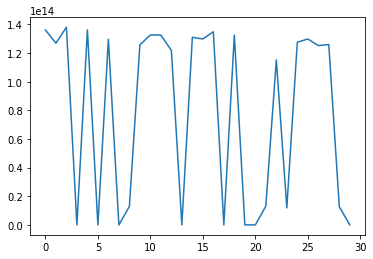

In [27]:
import matplotlib.pyplot as plt
plt.plot(temporal_time_points)

PROBLEM: HUGE variation in order of mangnitude for different measurements - the low ones are probably imputed > needs to be fixed!

# Merge APexpose and Covid datasets

In [28]:
merge_df = pollution_data.merge(covid_data, how='inner', on='county')
merge_df

,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,...,Lon,Lat,BL,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k
0,SK Freiburg i.Breisgau,2019,1.575711e+06,0.000000,6.600048e+06,554519.0,6.0,8370603.0,218.5,206925.0,...,781.807.596.196.695,479.925.229.956.189,Baden-Württemberg,230940,1.541063e+08,1.606712,11203,180,4851.043561,77.942323
1,SK Freiburg i.Breisgau,2019,1.575711e+06,0.000000,6.600048e+06,554519.0,6.0,8370603.0,218.5,206925.0,...,781.807.596.196.695,479.925.229.956.189,Baden-Württemberg,230940,1.541063e+08,1.606712,11203,180,4851.043561,77.942323
2,SK Freiburg i.Breisgau,2019,1.575711e+06,0.000000,6.600048e+06,554519.0,6.0,8370603.0,218.5,206925.0,...,781.807.596.196.695,479.925.229.956.189,Baden-Württemberg,230940,1.541063e+08,1.606712,11203,180,4851.043561,77.942323
3,SK Freiburg i.Breisgau,2013,1.490030e+13,0.003266,8.714800e+13,4839038.0,1.0,7672329.0,180.0,167125.0,...,781.807.596.196.695,479.925.229.956.189,Baden-Württemberg,230940,1.541063e+08,1.606712,11203,180,4851.043561,77.942323
4,SK Freiburg i.Breisgau,2013,1.547840e+14,0.005519,9.045150e+14,4839038.0,1.0,7672329.0,180.0,167125.0,...,781.807.596.196.695,479.925.229.956.189,Baden-Württemberg,230940,1.541063e+08,1.606712,11203,180,4851.043561,77.942323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,LK Greiz,2018,1.785670e+05,0.000000,1.502605e+06,5203447.0,0.0,8555937.0,1701013.0,1553521.0,...,120.740.705.738.675,507.484.595.537.929,Thüringen,96668,8.465426e+08,2.504856,9781,245,10118.136302,253.444780
11996,LK Greiz,2018,1.785670e+05,0.000000,1.502605e+06,5203447.0,0.0,8555937.0,1701013.0,1553521.0,...,120.740.705.738.675,507.484.595.537.929,Thüringen,96668,8.465426e+08,2.504856,9781,245,10118.136302,253.444780
11997,LK Greiz,2014,1.645816e+06,0.000000,1.745612e+06,4755796.0,0.0,7493859.0,1529368.0,1436465.0,...,120.740.705.738.675,507.484.595.537.929,Thüringen,96668,8.465426e+08,2.504856,9781,245,10118.136302,253.444780
11998,LK Greiz,2014,1.645816e+06,0.000000,1.745612e+06,4755796.0,0.0,7493859.0,1529368.0,1436465.0,...,120.740.705.738.675,507.484.595.537.929,Thüringen,96668,8.465426e+08,2.504856,9781,245,10118.136302,253.444780


In [31]:
merge_df.iloc[0][['Lon', 'Lat']]

Lon    781.807.596.196.695
Lat    479.925.229.956.189
Name: 0, dtype: object

!!!!!! Lon and Lat is not what we need - merge from Chris dataset

In [32]:
merge_df.columns

Index(['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2.5_annualMean', 'kreis_code', 'scenario',
       'ISO_code', 'Kreis_Scluessel', 'Lon', 'Lat', 'BL', 'EWZ', 'Shape__Area',
       'death_rate', 'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k'],
      dtype='object')

In [33]:
merge_df.dtypes

county                    object
year                       int64
NO2_annualMean           float64
NO2_hrOver200            float64
NO_annualMean            float64
O3_annualMean            float64
O3_daysOver120           float64
O3_dailyMaxAnnualMean    float64
O3_dailyHourlyMax        float64
O3_daily8HrMax           float64
PM10_annualMean          float64
PM10_daysOver50          float64
PM2.5_annualMean         float64
kreis_code                 int64
scenario                  object
ISO_code                  object
Kreis_Scluessel            int64
Lon                       object
Lat                       object
BL                        object
EWZ                        int64
Shape__Area              float64
death_rate               float64
cases                      int64
deaths                     int64
cases_per_100k           float64
deaths_per_100k          float64
dtype: object

# Covid & Air pollution - quick correlation check

In [46]:
# keep useful features only
merge_df = merge_df.iloc[0:400][['county', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'cases_per_100k','deaths_per_100k']]

In [35]:
merge_df = merge_df.rename(columns={'PM2.5_annualMean': 'PM2_5_annualMean'})

In [36]:
#numerical features
num_fact = ['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean']

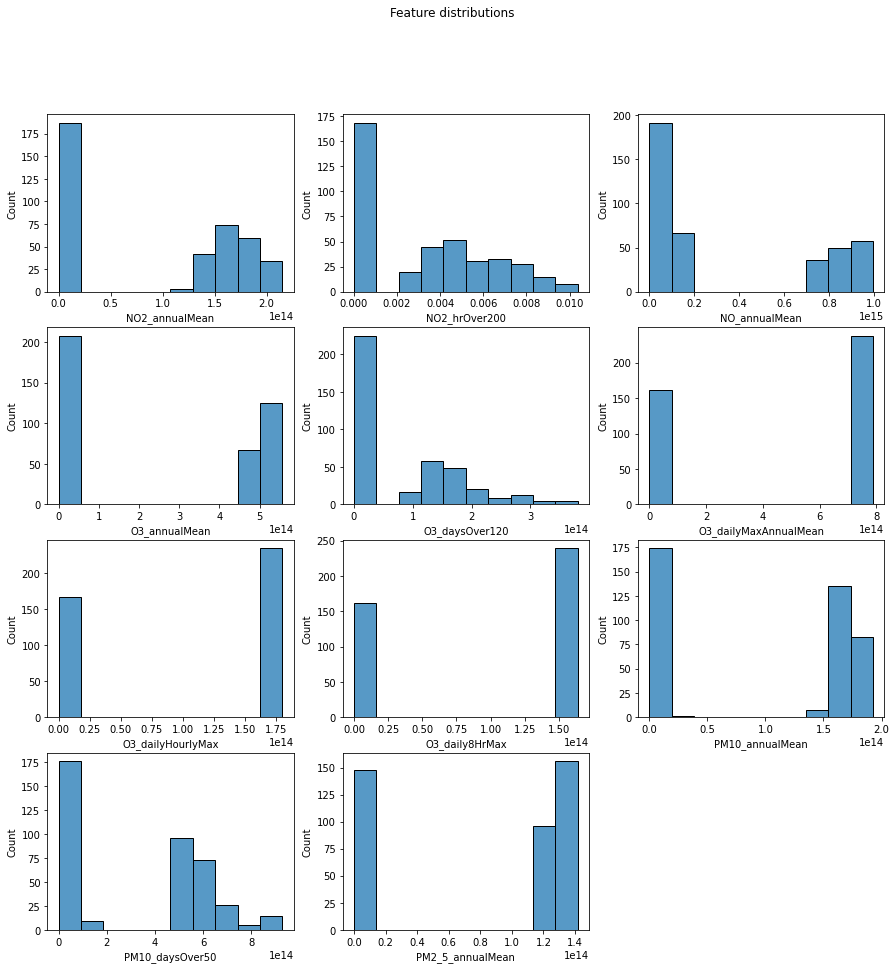

In [47]:
#check distribution of numerical features 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))

for i, feature in enumerate(num_fact):
    # First subplot
    plt.subplot(4,3,i+1)
    sns.histplot(merge_df[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

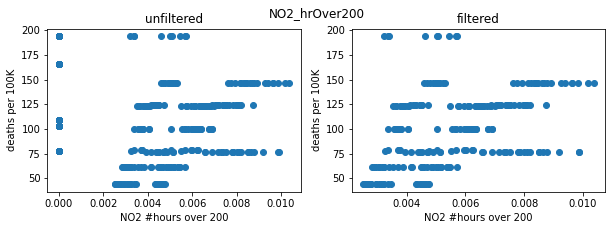

In [48]:
# Start a figure
plt.figure(figsize=(10,3))
# First subplot
plt.subplot(1,2,1)
plt.scatter(merge_df['NO2_hrOver200'], merge_df['deaths_per_100k'])
plt.xlabel("NO2 #hours over 200")
plt.ylabel("deaths per 100K")
plt.title('unfiltered')
# Second subplot
plt.subplot(1,2,2) 
x = merge_df[merge_df['NO2_hrOver200']>0.001]
plt.scatter(x['NO2_hrOver200'], x['deaths_per_100k'])
plt.xlabel("NO2 #hours over 200")
plt.ylabel("deaths per 100K")
plt.title("filtered")
# Global figure methods
plt.suptitle('NO2_hrOver200')
plt.show()

PROBLEM: for each pollutant, about half of the counties don't have measurement station and instead impute values - they cluster around 0, we might want to find a better way of imputing or dropping those data

In [49]:
import statsmodels.formula.api as smf

In [50]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_hrOver200', data = x).fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     47.98
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           4.27e-11
Time:                        10:13:53   Log-Likelihood:                -1153.2
No. Observations:                 232   AIC:                             2310.
Df Residuals:                     230   BIC:                             2317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.9743      7.058      7.505      0.000      39.067      66.882
NO2_hrOver200  8321.7989   1201.394      6.927      0.000    5954.654    1.07e+04
==============================================================================
Omnibus:                       28.379   Durbin-Watson:                   0.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.761
Skew:                           0.843   Prob(JB):                     1.72e-08
Kurtosis:                       3.924   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

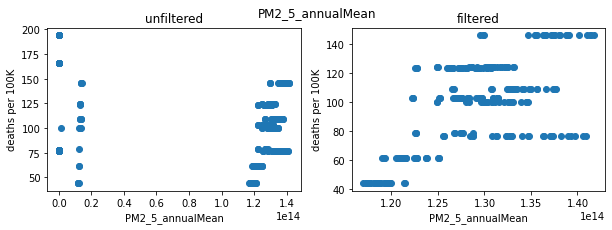

In [52]:
# Start a figure
plt.figure(figsize=(10,3))
# First subplot
plt.subplot(1,2,1)
plt.scatter(merge_df['PM2_5_annualMean'], merge_df['deaths_per_100k'])
plt.xlabel("PM2_5_annualMean")
plt.ylabel("deaths per 100K")
plt.title('unfiltered')
# Second subplot
plt.subplot(1,2,2) 
x = merge_df[merge_df['PM2_5_annualMean']>10**14]
plt.scatter(x['PM2_5_annualMean'], x['deaths_per_100k'])
plt.xlabel("PM2_5_annualMean")
plt.ylabel("deaths per 100K")
plt.title("filtered")
# Global figure methods
plt.suptitle('PM2_5_annualMean')
plt.show()

In [53]:
model = smf.ols(formula = 'deaths_per_100k ~ PM2_5_annualMean', data = x).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                nan
Time:                        10:14:06   Log-Likelihood:                -1192.5
No. Observations:                 252   AIC:                             2387.
Df Residuals:                     251   BIC:                             2390.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.902e-27   1.04e-28     56.791      0.000     5.7e-27    6.11e-27
PM2_5_annualMean  7.628e-13   1.34e-14     56.791      0.000    7.36e-13    7.89e-13
==============================================================================
Omnibus:                       89.822   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.667
Skew:                          -0.163   Prob(JB):                     0.000653
Kurtosis:                       1.864   Cond. No.                     2.78e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""